# Designing a Course Using ChatGPT API, NLP and K-Means Clustering

## Part 1 - Data Collection and Cleaning

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
import seaborn as sns
import openai
import nltk
import wordcloud
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
from wordcloud import WordCloud, ImageColorGenerator
from nltk.util import ngrams
from nltk.tokenize import  word_tokenize
nltk.download('punkt')
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
import spacy
import en_core_web_sm
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Webscraping

In [ ]:
# !pip install arsenic

In [ ]:
# import pandas as pd
# import numpy as np
# from bs4 import BeautifulSoup
# from datetime import datetime
# from arsenic import get_session
# from arsenic.browsers import Firefox
# from arsenic.services import Geckodriver
# import asyncio

# # disable arsenic logging to stdout
# import structlog
# import logging

# logger = logging.getLogger()
# logger.setLevel(logging.WARN)
# structlog.configure(logger_factory=lambda: logger)

In [ ]:
# !apt-get update
# !pip install selenium
# !apt install firefox-geckodriver
# !cp /usr/lib/geckodriver /usr/bin
# !cp /usr/lib/firefox /usr/bin

# from selenium import webdriver

In [ ]:
# driver_path = '/usr/bin/geckodriver'
# # Linux
# # driver_path = "./drivers/linux/geckodriver"
# # driver_path = "/usr/bin/geckodriver"

# options = {
#   'moz:firefoxOptions': {
#     # if you want it to be headless
#     'args': ['-headless'],
#     'log': {'level': 'warn'},
#     # Needed for windows / non-default firefox install
#     'binary': '/usr/bin/firefox'
#   }
# }

Data Analyst - Canada

In [ ]:
# ## Enter a job position
# position = "data analyst"
# ## Enter a location (City, State or Zip or remote)
# locations = "canada"

# def get_url(position, location):
#     url_template = "https://ca.indeed.com/jobs?q={}&l={}"
#     url = url_template.format(position, location)
#     return url

# url = get_url(position, locations)
# dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])

In [ ]:
# ## Number of postings to scrape
# postings = 1000

# ## Number of browser instances to use
# n = 3

# pages = list(range(0, postings, 10))

# state = {
#   'lock': asyncio.Lock(),
#   'ids': set(),
#   'n': 0
# }
             
# async def get_jobs(url, pages, state):
#   data = []
#   async with get_session(Geckodriver(binary=driver_path, log_file=asyncio.subprocess.PIPE), Firefox(**options)) as session:
#     for i in pages:
#       await session.get(url + "&start=" + str(i))
#       jobs = await session.get_elements("[class='job_seen_beacon']")

#       for job in jobs:
#         result_html = await job.get_property('innerHTML')
#         soup = BeautifulSoup(result_html, 'html.parser')

#         liens = await job.get_elements("a")
#         link = await liens[0].get_attribute("href")

#         title = soup.select('.jobTitle')[0].get_text().strip()
#         try:
#           company = soup.select('.companyName')[0].get_text().strip()
#         except:
#           continue
#         location = soup.select('.companyLocation')[0].get_text().strip()
#         try:
#             salary = soup.select('.salary-snippet-container')[0].get_text().strip()
#         except:
#             salary = 'NaN'
#         try:
#             rating = soup.select('.ratingNumber')[0].get_text().strip()
#         except:
#             rating = 'NaN'
#         try:
#             date = soup.select('.date')[0].get_text().strip()
#         except:
#             date = 'NaN'
#         try:
#             description = soup.select('.job-snippet')[0].get_text().strip()
#         except:
#             description = ''
            
#         Id = f"{title}{company}{location}{rating}{date}{salary}{description}"
#         dupe = False
#         async with state['lock']:
#           if Id in state['ids']:
#             dupe = True
#           else:
#             state['ids'].add(Id)
#             state['n'] = state['n'] + 1
#             print("Job number {0:4d} added - {1:s}".format(state['n'],title))
#         if dupe:
#           continue

#         data.append({
#           'Title': title,
#           "Company": company,
#           'Location': location,
#           'Rating': rating,
#           'Date': date,
#           "Salary": salary,
#           "Description": description,
#           "Links": link
#         })

#         # print("Job number {0:4d} added - {1:s}".format(jn,title))
#       i = i + 10
#   return data

# tasks = [asyncio.create_task(get_jobs(url, p, state)) for p in np.array_split(pages, n)]
# dataframe = pd.DataFrame([j for task in tasks for j in await task])

In [ ]:
# dataframe.to_csv('analyst_canada.csv', index=False)

Data Scientist - Canada

In [ ]:
# ## Enter a job position
# position = "data scientist"
# ## Enter a location (City, State or Zip or remote)
# locations = "canada"

# def get_url(position, location):
#     url_template = "https://ca.indeed.com/jobs?q={}&l={}"
#     url = url_template.format(position, location)
#     return url

# url = get_url(position, locations)
# dataframe2 = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])

In [ ]:
# ## Number of postings to scrape
# postings = 1000

# ## Number of browser instances to use
# n = 3

# pages = list(range(0, postings, 10))

# state = {
#   'lock': asyncio.Lock(),
#   'ids': set(),
#   'n': 0
# }
             
# async def get_jobs(url, pages, state):
#   data = []
#   async with get_session(Geckodriver(binary=driver_path, log_file=asyncio.subprocess.PIPE), Firefox(**options)) as session:
#     for i in pages:
#       await session.get(url + "&start=" + str(i))
#       jobs = await session.get_elements("[class='job_seen_beacon']")

#       for job in jobs:
#         result_html = await job.get_property('innerHTML')
#         soup = BeautifulSoup(result_html, 'html.parser')

#         liens = await job.get_elements("a")
#         link = await liens[0].get_attribute("href")

#         title = soup.select('.jobTitle')[0].get_text().strip()
#         try:
#           company = soup.select('.companyName')[0].get_text().strip()
#         except:
#           continue
#         location = soup.select('.companyLocation')[0].get_text().strip()
#         try:
#             salary = soup.select('.salary-snippet-container')[0].get_text().strip()
#         except:
#             salary = 'NaN'
#         try:
#             rating = soup.select('.ratingNumber')[0].get_text().strip()
#         except:
#             rating = 'NaN'
#         try:
#             date = soup.select('.date')[0].get_text().strip()
#         except:
#             date = 'NaN'
#         try:
#             description = soup.select('.job-snippet')[0].get_text().strip()
#         except:
#             description = ''
            
#         Id = f"{title}{company}{location}{rating}{date}{salary}{description}"
#         dupe = False
#         async with state['lock']:
#           if Id in state['ids']:
#             dupe = True
#           else:
#             state['ids'].add(Id)
#             state['n'] = state['n'] + 1
#             print("Job number {0:4d} added - {1:s}".format(state['n'],title))
#         if dupe:
#           continue

#         data.append({
#           'Title': title,
#           "Company": company,
#           'Location': location,
#           'Rating': rating,
#           'Date': date,
#           "Salary": salary,
#           "Description": description,
#           "Links": link
#         })

#         # print("Job number {0:4d} added - {1:s}".format(jn,title))
#       i = i + 10
#   return data

# tasks = [asyncio.create_task(get_jobs(url, p, state)) for p in np.array_split(pages, n)]
# dataframe2 = pd.DataFrame([j for task in tasks for j in await task])

In [ ]:
# pd.set_option('display.max_rows', None)

In [ ]:
# dataframe2.to_csv('scientist_canada.csv', index=False)

In [ ]:
# #appending both dataframes
# dataframe = dataframe.append(dataframe2, ignore_index=True)

In [ ]:
# dataframe.shape

In [ ]:
# Links_list = dataframe['Links'].tolist()

# import random

# async def get_description(urls):
    
#   descriptions = []
#   async with get_session(Geckodriver(binary=driver_path, log_file=asyncio.subprocess.PIPE), Firefox(**options)) as session:
#     for url in urls:
#       await session.get("https://www.indeed.com"+url)
      
#       try:  
#           jd = await session.get_element('.jobsearch-JobComponent-description')
#           descriptions.append(await jd.get_text())
         
  
#       except:
#         try:
#             jd = await session.get_element('#jobDescriptionText')
#             descriptions.append(await jd.get_text())
#         except:
#           descriptions.append("NaN")
          
      
#       await asyncio.sleep(random.random() * 1.5)
#       #print(descriptions)
#   return descriptions

# ## Number of browser instances to use
# n = 3

# tasks = [asyncio.create_task(get_description(urls)) for urls in np.array_split(Links_list, n)]
# dataframe['Descriptions'] = [desc for task in tasks for desc in await task]

In [ ]:
# dataframe

In [ ]:
# dataframe.to_csv('indeed_final_data.csv', index=False)

### Cleaning the Data

In [ ]:
indeed_df = pd.read_csv('webscraping_results_assignment3.csv')
indeed_df.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Data Conversion Analyst,Traxxall Technologies Inc,"Temporarily Remote in Montréal, QC",NaN,EmployerActive 1 day ago,NaN,Assist maintenance analysts in preparing enrol...,/pagead/clk?mo=r&ad=-6NYlbfkN0Dj8uOyZu2VskSSWI...,Job details\nJob Type\nFull-time\nPermanent\nQ...
1,ILI Data Analyst Level III – Inertial and MFL,United Pacific Projects,"Calgary, AB",NaN,EmployerActive 2 days ago,"$60,000–$120,000 a year","The Data Analyst II/III MFL, Inertial, Caliper...",/pagead/clk?mo=r&ad=-6NYlbfkN0DEw2CsQV-7THNjxk...,Job details\nJob Type\nFull-time\nQualificatio...
2,Data Analyst,Kindred Home Care,"Remote in Saint John, NB",3.7,EmployerActive 6 days ago,"$50,000–$60,000 a year",Providing technical expertise in data storage ...,/pagead/clk?mo=r&ad=-6NYlbfkN0CzNv1cnuDtLNmNQ2...,Job details\nJob Type\nFull-time\nPermanent\nQ...
3,Data Analyst,Russell Hendrix Foodservice Equipment,"Hybrid remote in Etobicoke, ON+1 location",2.6,PostedPosted 30+ days ago,NaN,You have at least 3 years working experience a...,/pagead/clk?mo=r&ad=-6NYlbfkN0B524p5IGI3HMh8ig...,Job details\nJob Type\nFull-time\nPermanent\nB...
4,Business Operations Analyst,Pan American Silver Corp.,"Vancouver, BC",NaN,PostedPosted 5 days ago,NaN,"Assist with designing, maintaining, and produc...",/pagead/clk?mo=r&ad=-6NYlbfkN0D4Zy3E48OoleVtf2...,Job details\nJob Type\nFull-time\nPermanent\nQ...


In [ ]:
#getting the info
indeed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1311 non-null   object 
 1   Company       1311 non-null   object 
 2   Location      1311 non-null   object 
 3   Rating        832 non-null    float64
 4   Date          1311 non-null   object 
 5   Salary        313 non-null    object 
 6   Description   1311 non-null   object 
 7   Links         1311 non-null   object 
 8   Descriptions  1301 non-null   object 
dtypes: float64(1), object(8)
memory usage: 92.3+ KB


In [ ]:
#checking for NaN values
indeed_df.isna().sum()

Title             0
Company           0
Location          0
Rating          479
Date              0
Salary          998
Description       0
Links             0
Descriptions     10
dtype: int64

In [ ]:
#checking the number of rows and columns
indeed_df.shape

(1311, 9)

In [ ]:
#handling missing salary data

def salary_cleaning(salary):

    #converting all missing salaries to NaN instead of the string 'NaN'
    if isinstance(salary, str) and salary.lower() == 'nan':
        return np.nan
    
    if not isinstance(salary, str):
        return np.nan
    
    #checking for salary strings that match the pattern
    sal_match = re.findall('\$[\d,]+', salary)
    if len(sal_match) == 0:
        return np.nan

    #converting hourly salary to yearly salary 
    if 'hour' in salary.lower():
        min_sal = int(sal_match[0].replace(',', '').replace('$', ''))*1920 
        max_sal = int(sal_match[0].replace(',', '').replace('$', ''))*1920
    
    #converting the salary range to int to calculate the average
    else:
      min_sal = int(sal_match[0].replace(',', '').replace('$', ''))
      max_sal = int(sal_match[-1].replace(',', '').replace('$', ''))
    
    avg_sal = float((min_sal + max_sal)/2.0)
    return avg_sal

In [ ]:
indeed_df['Salary'] = indeed_df['Salary'].apply(salary_cleaning)

Average salaries taken from https://ca.indeed.com/career/salaries

In [ ]:
#imputing missing salaries with the canadian average for the specific job titles

indeed_df['Salary'].iloc[:794].fillna(63741, inplace = True)
indeed_df['Salary'].iloc[794:].fillna(88472, inplace = True)

In [ ]:
#removing job postings without a full description

indeed_df = indeed_df[indeed_df['Descriptions'].str.contains("NaN")==False ]
indeed_df = indeed_df.reset_index(drop=True)
indeed_df.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Data Conversion Analyst,Traxxall Technologies Inc,"Temporarily Remote in Montréal, QC",NaN,EmployerActive 1 day ago,63741.0,Assist maintenance analysts in preparing enrol...,/pagead/clk?mo=r&ad=-6NYlbfkN0Dj8uOyZu2VskSSWI...,Job details\nJob Type\nFull-time\nPermanent\nQ...
1,ILI Data Analyst Level III – Inertial and MFL,United Pacific Projects,"Calgary, AB",NaN,EmployerActive 2 days ago,90000.0,"The Data Analyst II/III MFL, Inertial, Caliper...",/pagead/clk?mo=r&ad=-6NYlbfkN0DEw2CsQV-7THNjxk...,Job details\nJob Type\nFull-time\nQualificatio...
2,Data Analyst,Kindred Home Care,"Remote in Saint John, NB",3.7,EmployerActive 6 days ago,55000.0,Providing technical expertise in data storage ...,/pagead/clk?mo=r&ad=-6NYlbfkN0CzNv1cnuDtLNmNQ2...,Job details\nJob Type\nFull-time\nPermanent\nQ...
3,Data Analyst,Russell Hendrix Foodservice Equipment,"Hybrid remote in Etobicoke, ON+1 location",2.6,PostedPosted 30+ days ago,63741.0,You have at least 3 years working experience a...,/pagead/clk?mo=r&ad=-6NYlbfkN0B524p5IGI3HMh8ig...,Job details\nJob Type\nFull-time\nPermanent\nB...
4,Business Operations Analyst,Pan American Silver Corp.,"Vancouver, BC",NaN,PostedPosted 5 days ago,63741.0,"Assist with designing, maintaining, and produc...",/pagead/clk?mo=r&ad=-6NYlbfkN0D4Zy3E48OoleVtf2...,Job details\nJob Type\nFull-time\nPermanent\nQ...


In [ ]:
indeed_df['Descriptions'].head()

0    Job details\nJob Type\nFull-time\nPermanent\nQ...
1    Job details\nJob Type\nFull-time\nQualificatio...
2    Job details\nJob Type\nFull-time\nPermanent\nQ...
3    Job details\nJob Type\nFull-time\nPermanent\nB...
4    Job details\nJob Type\nFull-time\nPermanent\nQ...
Name: Descriptions, dtype: object

In [ ]:
#removing additional text present in full job description

#function for replacing pattern  
def finding_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, " ", input_txt)        
    return input_txt

#function for defining what to replace
def cleaning_text(text):    
    text = np.vectorize(finding_pattern)(text, ".*?(Indeed's salary guide)")
    text = np.vectorize(finding_pattern)(text, ".*?(Not provided by employer)")
    text = np.vectorize(finding_pattern)(text, ".*(a year is Indeed's estimated salary for this role)")
    text = np.vectorize(finding_pattern)(text, "\n")

    return text

In [ ]:
indeed_df['Descriptions'] = cleaning_text(indeed_df['Descriptions'])
# indeed_df['Descriptions'].head()

In [ ]:
#removing some more unecessary text

indeed_df['Descriptions'] = indeed_df['Descriptions'].str.split('Full Job Description').str[-1]
indeed_df['Descriptions'] = indeed_df['Descriptions'].str.split('Job Activity').str[0]
indeed_df['Descriptions'] = indeed_df['Descriptions'].str.split('Hiring Insight').str[0]
indeed_df['Descriptions'] = indeed_df['Descriptions'].str.split('Job Type').str[0]
indeed_df['Descriptions'] = indeed_df['Descriptions'].str.lstrip()

#removing bullet points and converting all text to lowercase

indeed_df['Descriptions']=indeed_df['Descriptions'].str.replace('·', ' . ', regex=True)
indeed_df['Descriptions']=indeed_df['Descriptions'].str.replace('●',' . ', regex=True)
indeed_df['Descriptions']=indeed_df['Descriptions'].str.lower()

In [ ]:
indeed_df['Descriptions'].head()

0    the junior data conversion analyst is an entry...
1    ili data analyst level ii/iii – mfl, inertial,...
2    data analyst we are looking for a data analyst...
3    russell hendrix is looking to add a data analy...
4    pan american silver was created with the inten...
Name: Descriptions, dtype: object

In [ ]:
#removing the empty descriptions

indeed_df = indeed_df[indeed_df['Descriptions'] != '']
indeed_df = indeed_df.reset_index(drop=True)
indeed_df.shape
# (indeed_df.Descriptions.values == '').sum()

(1296, 9)

In [ ]:
#removing stop words

stopwords = stopwords.words('english')
indeed_df['Descriptions'] = indeed_df['Descriptions'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
#converting location to lowercase
indeed_df['Location']=indeed_df['Location'].str.lower()

In [ ]:
#cleaning the location data

def location_cleaning(location):
    if location == 'remote':
        return 'remote', np.nan, np.nan

    elif 'hybrid remote in' in location:
      parts = location.split('remote in ')[1].split(',')
      city = parts[0].strip()
      province = parts[1].split('+')[0].strip() if len(parts) > 1 else np.nan
      return 'hybrid', city, province

    elif 'remote in' in location:
        parts = location.split('remote in ')[1].split(',')
        city = parts[0].strip()
        province = parts[1].split('+')[0].strip() if len(parts) > 1 else np.nan
        return 'remote', city, province
    else:
        parts = location.split(',')
        if len(parts) > 1:
            city = parts[0].strip()
            province = parts[1].split('+')[0].strip() if len(parts) > 1 else np.nan
            return 'in-person', city, province
        else:
            return np.nan, np.nan, np.nan

In [ ]:
indeed_df[['Mode of Work', 'City', 'Province']] = indeed_df['Location'].apply(location_cleaning).apply(pd.Series)
indeed_df = indeed_df.drop('Location', axis=1)

## Part 2 - EDA and Feature Engineering

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Using Chat GPT API

In [ ]:
openai.api_key = '***************'

def getting_skills(prompt):
  completions = openai.ChatCompletion.create(
      model="gpt-3.5-turbo", 
      messages=[
          {"role": "system", "content": "You are designing courses for a Masters of Business Administration program in Data Science and Artificial Intelligence."},
          {"role": "user", "content": prompt}])

  message = completions.choices[0].message.content
  return message

In [ ]:
# defining technical skills for data analyst 
# tech_skills = getting_skills('Give me a list of 50 technical skills required by data analysts and data scientists, without explanations or introduction.')

In [ ]:
# tech_skills = [skill.strip() for skill in tech_skills.split('\n') if skill.strip()]
# tech_skills = [skill[3:] for skill in tech_skills]

# print(tech_skills)

In [ ]:
# defining technical skills for data analyst 
# soft_skills = getting_skills('Give me a list of 50 soft skills required by data analysts and data scientists, without explanations or introduction.')

In [ ]:
# soft_skills = [skill.strip() for skill in soft_skills.split('\n') if skill.strip()]
# soft_skills = [skill[3:] for skill in soft_skills]

# print(soft_skills)

The list 'gpt_skills' was obtained by appending 'tech_skills' and 'soft_skills'

In [ ]:
gpt_skills = ['Statistics', 'Machine Learning', 'Deep Learning', 'Natural Language Processing', 'Data Mining', 'Data Visualization', 'Predictive Modeling', 'Regression Analysis', 'Time Series Forecasting', 'Optimization Techniques', 'Experimental Design', 'Image Processing', 'Text Mining', 'Web Scraping', 'Data Warehousing', 'SQL', 'NoSQL', 'Hadoop', 'Spark', 'Kafka', 'MapReduce', 'Hive', 'Pig', 'R', 'Python', 'Java', 'Scala', 'MATLAB', 'Excel', 'Tableau', 'Power BI', 'D3.js', 'Seaborn', 'Matplotlib', 'Scikit-learn', 'Tensorflow', 'Keras', 'GridSearchCV', 'Random Forest', 'Naive Bayes', 'SVM', 'Clustering', 'Dimensionality Reduction', 'Feature Selection', 'Regularization', 'Gradient Boosting', 'Artificial Neural Networks', 'Convolutional Neural Networks', 'Recurrent Neural Networks', 'Transfer Learning', 'Communication', 'Teamwork', 'Adaptability', 'Creativity', 'Problem solving', 'Critical thinking', 'Time management', 'Attention to detail', 'Leadership', 'Emotional intelligence', 'Empathy', 'Active listening', 'Interpersonal skills', 'Cross-functional collaboration', 'Decision making', 'Analytical skills', 'Conflict resolution', 'Negotiation', 'Flexibility', 'Goal setting', 'Self-motivation', 'Work ethic', 'Persuasion', 'Influence', 'Integrity', 'Trustworthiness', 'Cross-cultural competence', 'Cultural sensitivity', 'Resilience', 'Prioritization', 'Self-awareness', 'Curiosity', 'Adaptability', 'Critical feedback', 'Learning agility', 'Continuous improvement', 'Time management', 'Risk assessment', 'Business acumen', 'Stakeholder management', 'Technological agility', 'Industry knowledge', 'Business diplomacy', 'Partnership management', 'Entrepreneurial mindset', 'Strategic thinking', 'Mindfulness', 'Innovation', 'Storytelling', 'Presentation skills']

In [ ]:
own_skills = ['AWS', 'Azure', 'MongoDB', 'RapidMiner']

In [ ]:
total_skills = gpt_skills + own_skills

### Extracting Skills from Job Descriptions

In [ ]:
nlp = en_core_web_sm.load()

total_skills = [skill.lower() for skill in total_skills]

#using spacy to count the instance of each skill in job descriptions
def counting_skills(text):
  
  #creating a dictionary to keep count of skills
  counts =  {key: 0 for key in total_skills} 
  doc = nlp(text)

  for element in doc:

    #checking if exact match is present in skills
    if element.text in counts:
      counts[element.text] += 1
      
    #checking if bi-gram is there in text
    elif element.i < len(doc)-1 and element.text + ' ' + doc[element.i+1].text in counts:
      counts[element.text + ' ' + doc[element.i+1].text] += 1
      
  return counts

In [ ]:
indeed_df['Counts'] = indeed_df['Descriptions'].apply(counting_skills)
counts_df = pd.DataFrame(indeed_df['Counts'].tolist())

In [ ]:
skills_df = pd.concat([indeed_df, counts_df], axis=1)
skills_df.drop(columns=['Counts'],axis=1,inplace=True)

In [ ]:
skills_df.head()

,Title,Company,Rating,Date,Salary,Description,Links,Descriptions,Mode of Work,City,Province,statistics,machine learning,deep learning,natural language processing,data mining,data visualization,predictive modeling,regression analysis,time series forecasting,optimization techniques,experimental design,image processing,text mining,web scraping,data warehousing,sql,nosql,hadoop,spark,kafka,mapreduce,hive,pig,r,python,java,scala,matlab,excel,tableau,power bi,d3.js,seaborn,matplotlib,scikit-learn,tensorflow,keras,gridsearchcv,random forest,naive bayes,svm,clustering,dimensionality reduction,feature selection,regularization,gradient boosting,artificial neural networks,convolutional neural networks,recurrent neural networks,transfer learning,communication,teamwork,adaptability,creativity,problem solving,critical thinking,time management,attention to detail,leadership,emotional intelligence,empathy,active listening,interpersonal skills,cross-functional collaboration,decision making,analytical skills,conflict resolution,negotiation,flexibility,goal setting,self-motivation,work ethic,persuasion,influence,integrity,trustworthiness,cross-cultural competence,cultural sensitivity,resilience,prioritization,self-awareness,curiosity,critical feedback,learning agility,continuous improvement,risk assessment,business acumen,stakeholder management,technological agility,industry knowledge,business diplomacy,partnership management,entrepreneurial mindset,strategic thinking,mindfulness,innovation,storytelling,presentation skills,aws,azure,mongodb,rapidminer
0,Data Conversion Analyst,Traxxall Technologies Inc,NaN,EmployerActive 1 day ago,63741.0,Assist maintenance analysts in preparing enrol...,/pagead/clk?mo=r&ad=-6NYlbfkN0Dj8uOyZu2VskSSWI...,junior data conversion analyst entry level pos...,remote,montréal,qc,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,ILI Data Analyst Level III – Inertial and MFL,United Pacific Projects,NaN,EmployerActive 2 days ago,90000.0,"The Data Analyst II/III MFL, Inertial, Caliper...",/pagead/clk?mo=r&ad=-6NYlbfkN0DEw2CsQV-7THNjxk...,"ili data analyst level ii/iii – mfl, inertial,...",in-person,calgary,ab,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Data Analyst,Kindred Home Care,3.7,EmployerActive 6 days ago,55000.0,Providing technical expertise in data storage ...,/pagead/clk?mo=r&ad=-6NYlbfkN0CzNv1cnuDtLNmNQ2...,data analyst looking data analyst join team. r...,remote,saint john,nb,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Data Analyst,Russell Hendrix Foodservice Equipment,2.6,PostedPosted 30+ days ago,63741.0,You have at least 3 years working experience a...,/pagead/clk?mo=r&ad=-6NYlbfkN0B524p5IGI3HMh8ig...,russell hendrix looking add data analyst exper...,hybrid,etobicoke,on,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Business Operations Analyst,Pan American Silver Corp.,NaN,PostedPosted 5 days ago,63741.0,"Assist with designing, maintaining, and produc...",/pagead/clk?mo=r&ad=-6NYlbfkN0D4Zy3E48OoleVtf2...,pan american silver created intention provide ...,in-person,vancouver,bc,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Visualizations

In [ ]:
#for skills vs count plot
skills = skills_df.iloc[:,11:].sum()

In [ ]:
#removing skills that have 0 mentions in any job description
to_remove = skills.sort_values(ascending = True)[:19].index.tolist()
skills_df = skills_df.drop(columns = to_remove)
skills = skills_df.iloc[:,11:].sum()

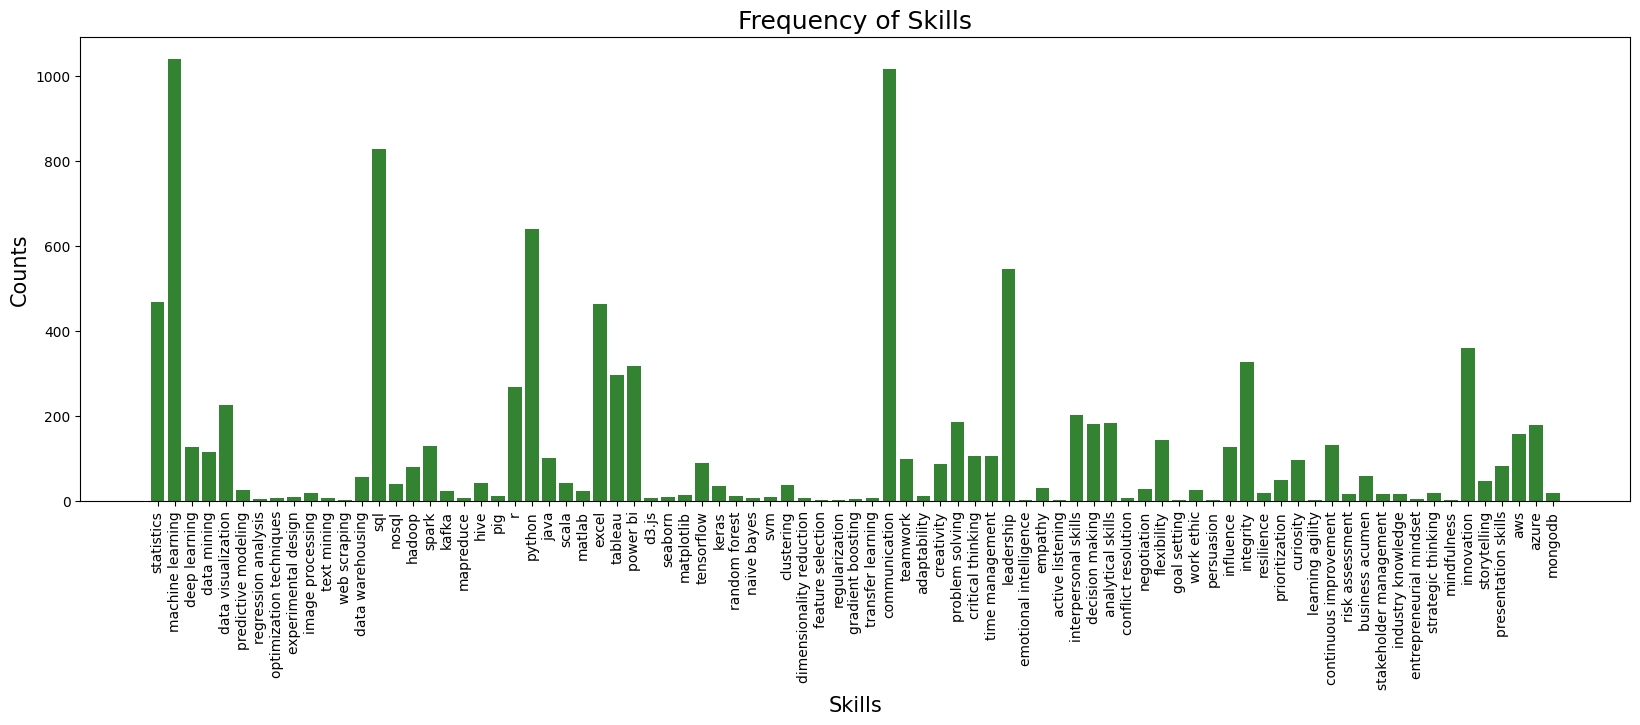

In [ ]:
#1. plotting frequency of skills

plt.figure(figsize=(20,8))
plt.bar(skills.index, skills_df.iloc[:,11:].sum(), width = 0.8, color = 'darkgreen', alpha = 0.8)

plt.title('Frequency of Skills', fontsize = 18)
plt.xlabel('Skills', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.show()

In [ ]:
print('Most Sought After Skills\n\n{}'.format(skills.sort_values(ascending = False)[:10]))

Most Sought After Skills

machine learning    1040
communication       1015
sql                  827
python               639
leadership           544
statistics           468
excel                463
innovation           359
integrity            326
power bi             317
dtype: int64


In [ ]:
skills.sort_values(ascending = False)

machine learning            1040
communication               1015
sql                          827
python                       639
leadership                   544
statistics                   468
excel                        463
innovation                   359
integrity                    326
power bi                     317
tableau                      295
r                            267
data visualization           226
interpersonal skills         202
problem solving              184
analytical skills            183
decision making              181
azure                        179
aws                          157
flexibility                  143
continuous improvement       131
spark                        128
influence                    125
deep learning                125
data mining                  114
critical thinking            105
time management              104
java                         101
teamwork                      99
curiosity                     96
tensorflow

In [ ]:
#for skills vs salary plot

skills_selected  = ['r', 'sql', 'tableau', 'power bi', 'excel', 'python', 'hadoop', 'aws', 'azure', 'mongodb']
skills_sal = []

for i in skills_selected:
  rows = skills_df[i] > 0
  rows_filtered = indeed_df[rows]
  avg_sal = rows_filtered['Salary'].mean()
  skills_sal.append(avg_sal)

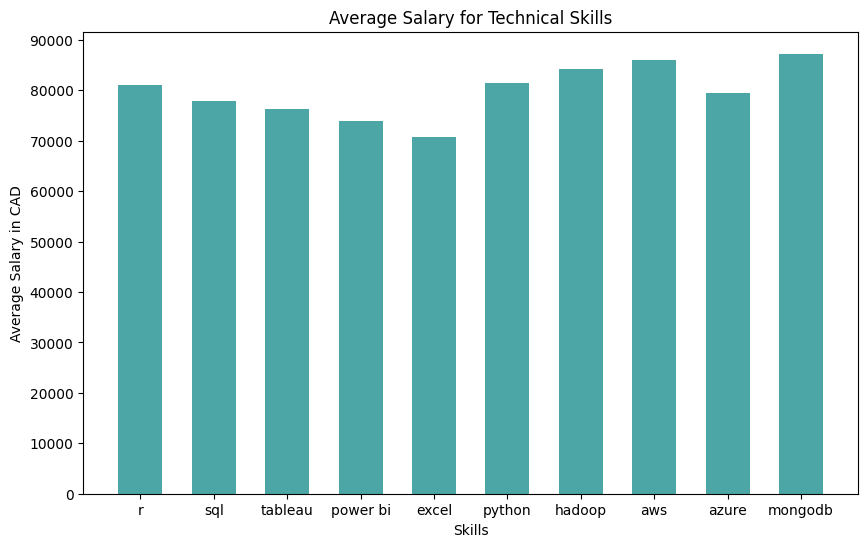

In [ ]:
#2. plotting average salary of skills

plt.figure(figsize=(10,6))
plt.bar(skills_selected, skills_sal, width = 0.6, color = 'teal', alpha = 0.7)
plt.title('Average Salary for Technical Skills')
plt.xlabel('Skills')
plt.ylabel('Average Salary in CAD')
plt.yticks(np.arange(0,100000,10000))
plt.show()

In [ ]:
#grouping companies by their max and mean corresponding salaries
company_salary = skills_df[['Company', 'Salary']]
salary_max = company_salary.groupby(['Company']).max()
salary_mean = company_salary.groupby(['Company']).mean()

#getting top 20 companies based on max and mean salaries
top_20_max = salary_max.sort_values(by = 'Salary', ascending = False).head(20)
top_20_mean = salary_mean.sort_values(by = 'Salary', ascending = False).head(20)
top_20_max = top_20_max.reset_index()
top_20_mean = top_20_mean.reset_index()

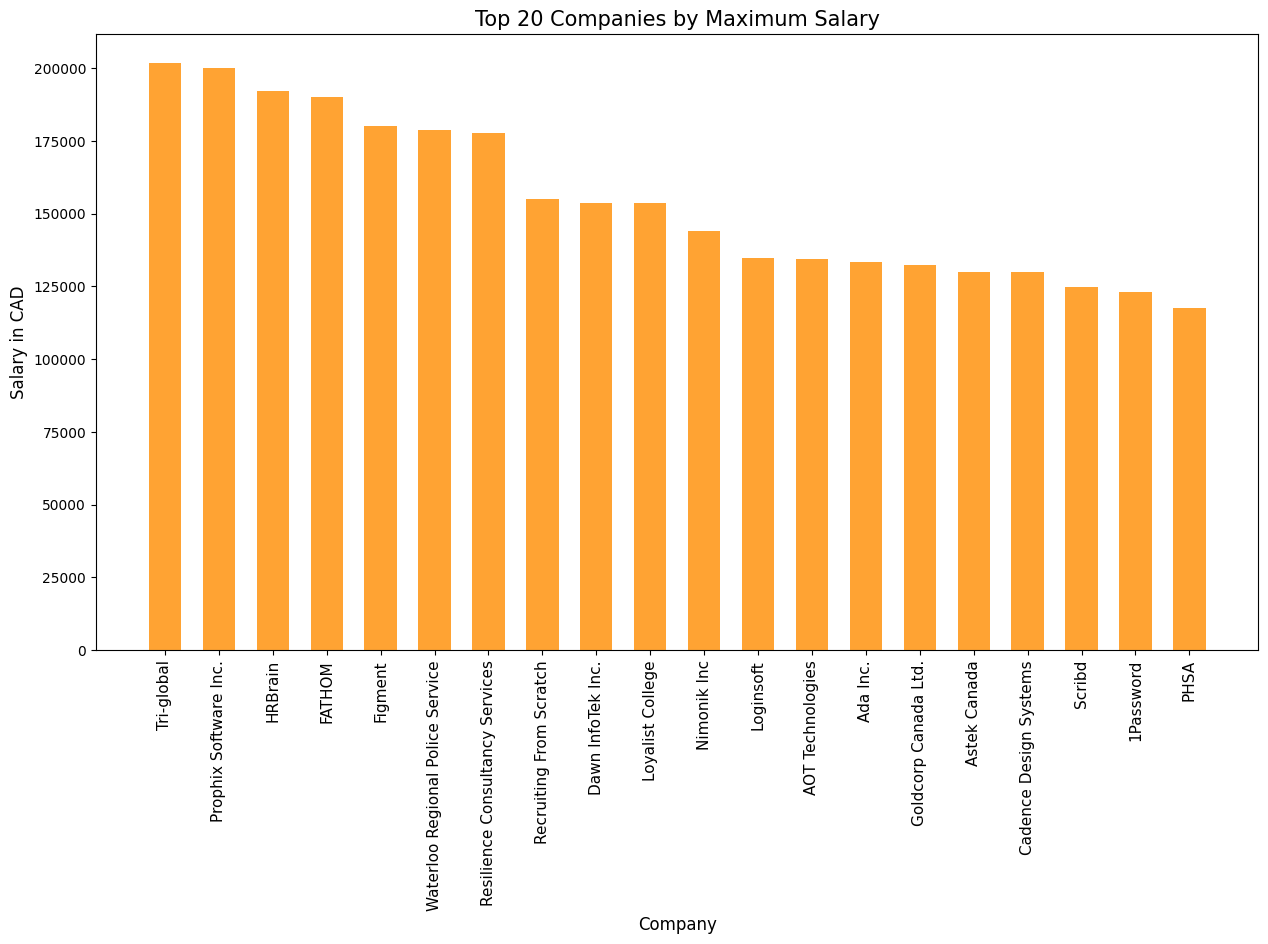

In [ ]:
#plotting the top 20 companies by max salary

plt.figure(figsize=(15, 8))
plt.bar(top_20_max['Company'], top_20_max['Salary'], color='darkorange', width = 0.6, alpha = 0.8)
plt.xlabel('Company', fontsize = 12)
plt.ylabel('Salary in CAD', fontsize = 12)
plt.title('Top 20 Companies by Maximum Salary', fontsize = 15)
plt.xticks(rotation=90, fontsize = 11)
plt.show()

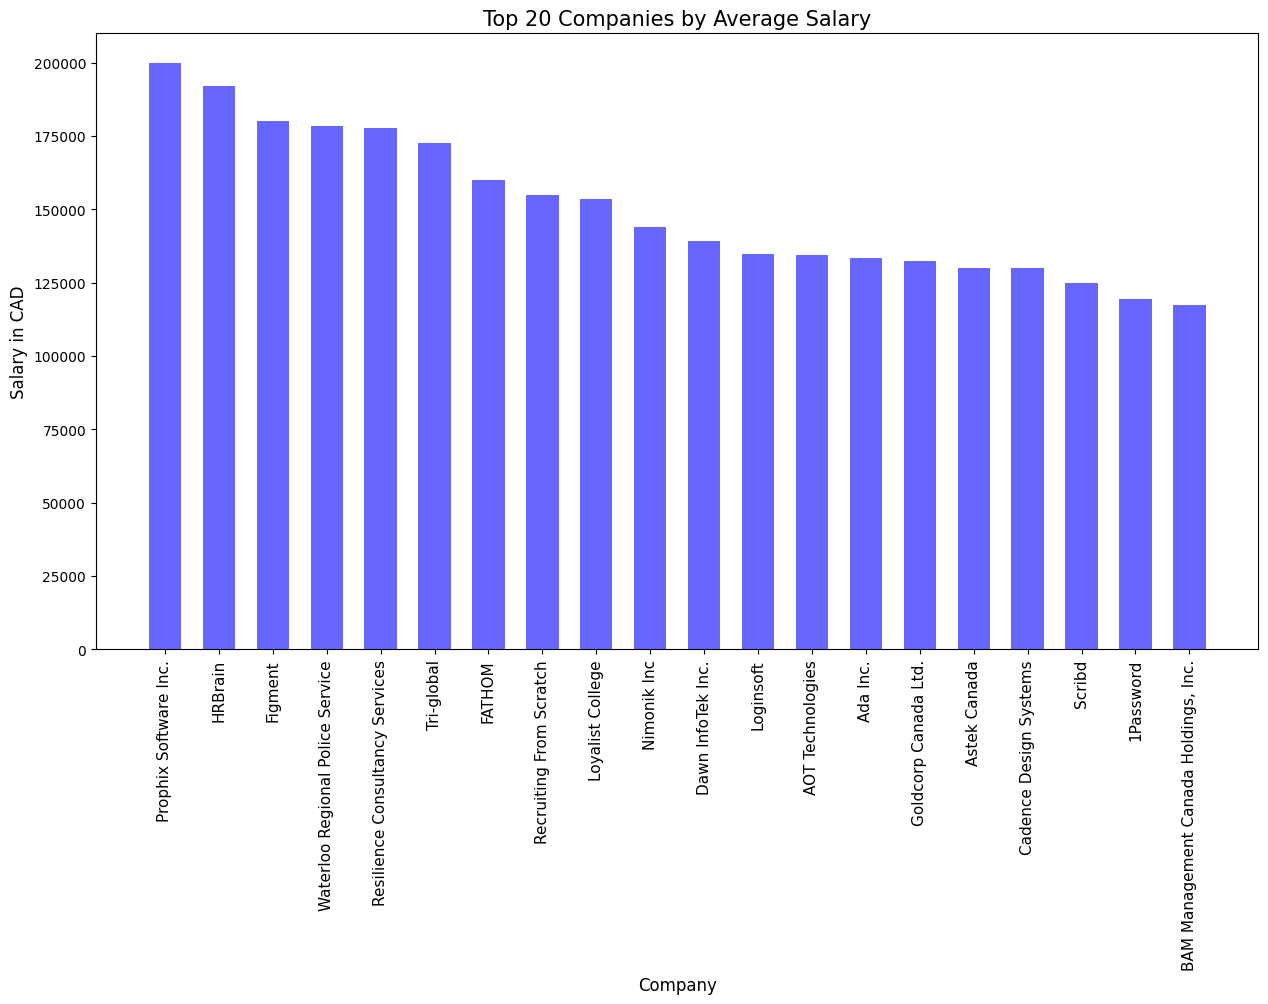

In [ ]:
#plotting the top 20 companies by mean salary

plt.figure(figsize=(15, 8))
plt.bar(top_20_mean['Company'], top_20_mean['Salary'], color='blue', width = 0.6, alpha = 0.6)
plt.xlabel('Company', fontsize = 12)
plt.ylabel('Salary in CAD', fontsize = 12)
plt.title('Top 20 Companies by Average Salary', fontsize = 15)
plt.xticks(rotation=90, fontsize = 11)
plt.show()

In [ ]:
#grouping provinces by their max and mean corresponding salaries
province_salary = skills_df[['Province', 'Salary']]
salary_loc = province_salary.groupby(['Province']).mean()
salary_loc_max = province_salary.groupby(['Province']).max()

#appending max salary column along with mean salary column
salary_loc = salary_loc.reset_index()
salary_loc_max = salary_loc_max.reset_index()
salary_loc['Max Salary'] = salary_loc_max['Salary']

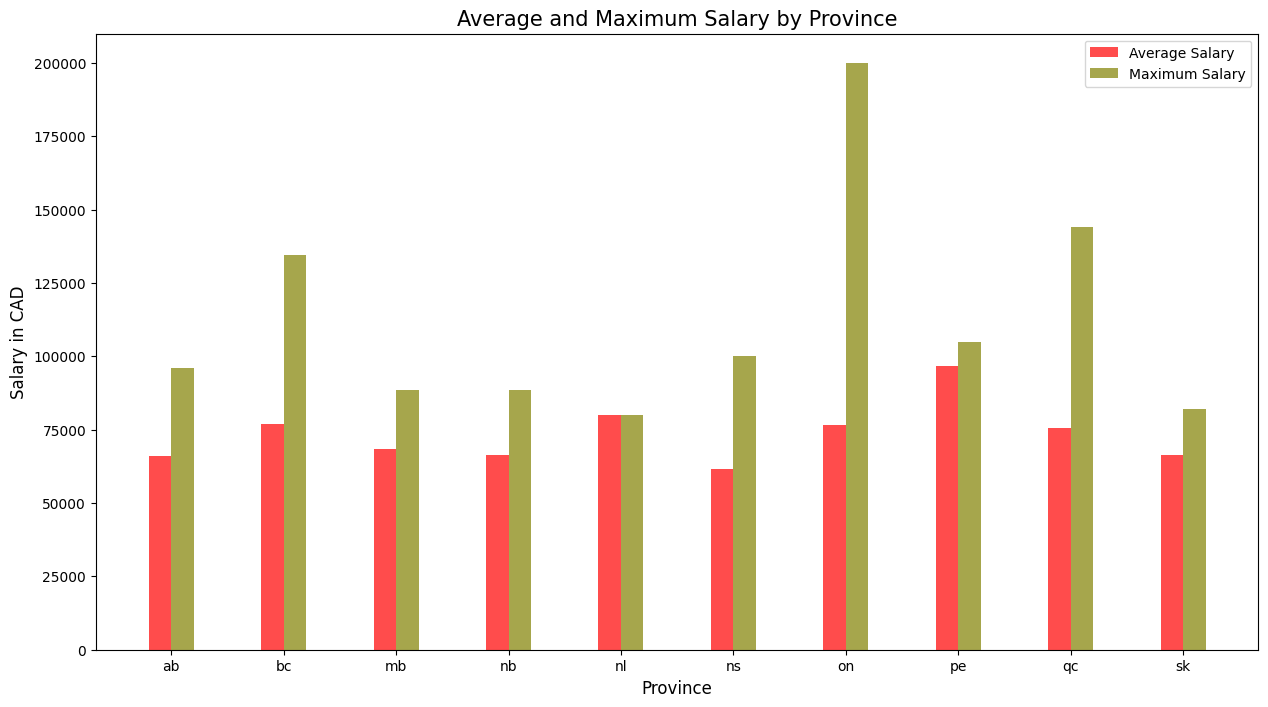

In [ ]:
#plotting the top 20 companies by mean salary
plt.figure(figsize=(15, 8))
plt.bar(salary_loc['Province'], salary_loc['Salary'], color='red', width = -0.2, align = 'edge', alpha = 0.7, label = 'Average Salary')
plt.bar(salary_loc['Province'], salary_loc['Max Salary'], color='olive', width = 0.2, align = 'edge', alpha = 0.7, label = 'Maximum Salary')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Salary in CAD', fontsize = 12)
plt.title('Average and Maximum Salary by Province', fontsize = 15)
plt.legend()
plt.show()

## Part 3 - Hierarchical Clustering

### One Hot Encoding

In [ ]:
skill_counts_df = skills_df.copy()

In [ ]:
#extracting only the columns with the skills
encoded_df = skills_df.iloc[:,11:]

In [ ]:
#one hot encoding
encoded_df = encoded_df.applymap(lambda x: 1 if x != 0 else x)
encoded_df.head()

,statistics,machine learning,deep learning,data mining,data visualization,predictive modeling,regression analysis,optimization techniques,experimental design,image processing,text mining,web scraping,data warehousing,sql,nosql,hadoop,spark,kafka,mapreduce,hive,pig,r,python,java,scala,matlab,excel,tableau,power bi,d3.js,seaborn,matplotlib,tensorflow,keras,random forest,naive bayes,svm,clustering,dimensionality reduction,feature selection,regularization,gradient boosting,transfer learning,communication,teamwork,adaptability,creativity,problem solving,critical thinking,time management,leadership,emotional intelligence,empathy,active listening,interpersonal skills,decision making,analytical skills,conflict resolution,negotiation,flexibility,goal setting,work ethic,persuasion,influence,integrity,resilience,prioritization,curiosity,learning agility,continuous improvement,risk assessment,business acumen,stakeholder management,industry knowledge,entrepreneurial mindset,strategic thinking,mindfulness,innovation,storytelling,presentation skills,aws,azure,mongodb
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Distance Matrix and Hierarchical Clustering

In [ ]:
#calculating the distance matrix 
distance_mat_cos = pdist(encoded_df.T, metric='cosine')
distance_sq_cos = squareform(distance_mat_cos)

In [ ]:
#hierarchical clustering

clusters = linkage(distance_sq_cos, method='complete')

tr = 1.7 #distance threhold for splitting skills 
skills_assign = fcluster(clusters, t=tr, criterion='distance')

cluster_num = len(set(skills_assign))
for cluster in range(1, cluster_num+1):
    skills_finding = np.where(skills_assign == cluster)
    skills_extracted = list(encoded_df.columns[skills_finding])
    print('Cluster {}: {}'.format(cluster, (', ').join(skills_extracted)))
    print('Size: {}'.format(len(skills_extracted)))
    print('-'*100)

Cluster 1: predictive modeling, regression analysis, optimization techniques, experimental design, image processing, text mining, web scraping, kafka, d3.js, feature selection, regularization, gradient boosting, transfer learning, adaptability, emotional intelligence, empathy, active listening, conflict resolution, negotiation, goal setting, work ethic, persuasion, resilience, prioritization, learning agility, risk assessment, business acumen, stakeholder management, industry knowledge, entrepreneurial mindset, strategic thinking, mindfulness
Size: 32
----------------------------------------------------------------------------------------------------
Cluster 2: seaborn, matplotlib, random forest, clustering
Size: 4
----------------------------------------------------------------------------------------------------
Cluster 3: matlab, naive bayes, svm, dimensionality reduction
Size: 4
----------------------------------------------------------------------------------------------------
Clu

### Dendrogram

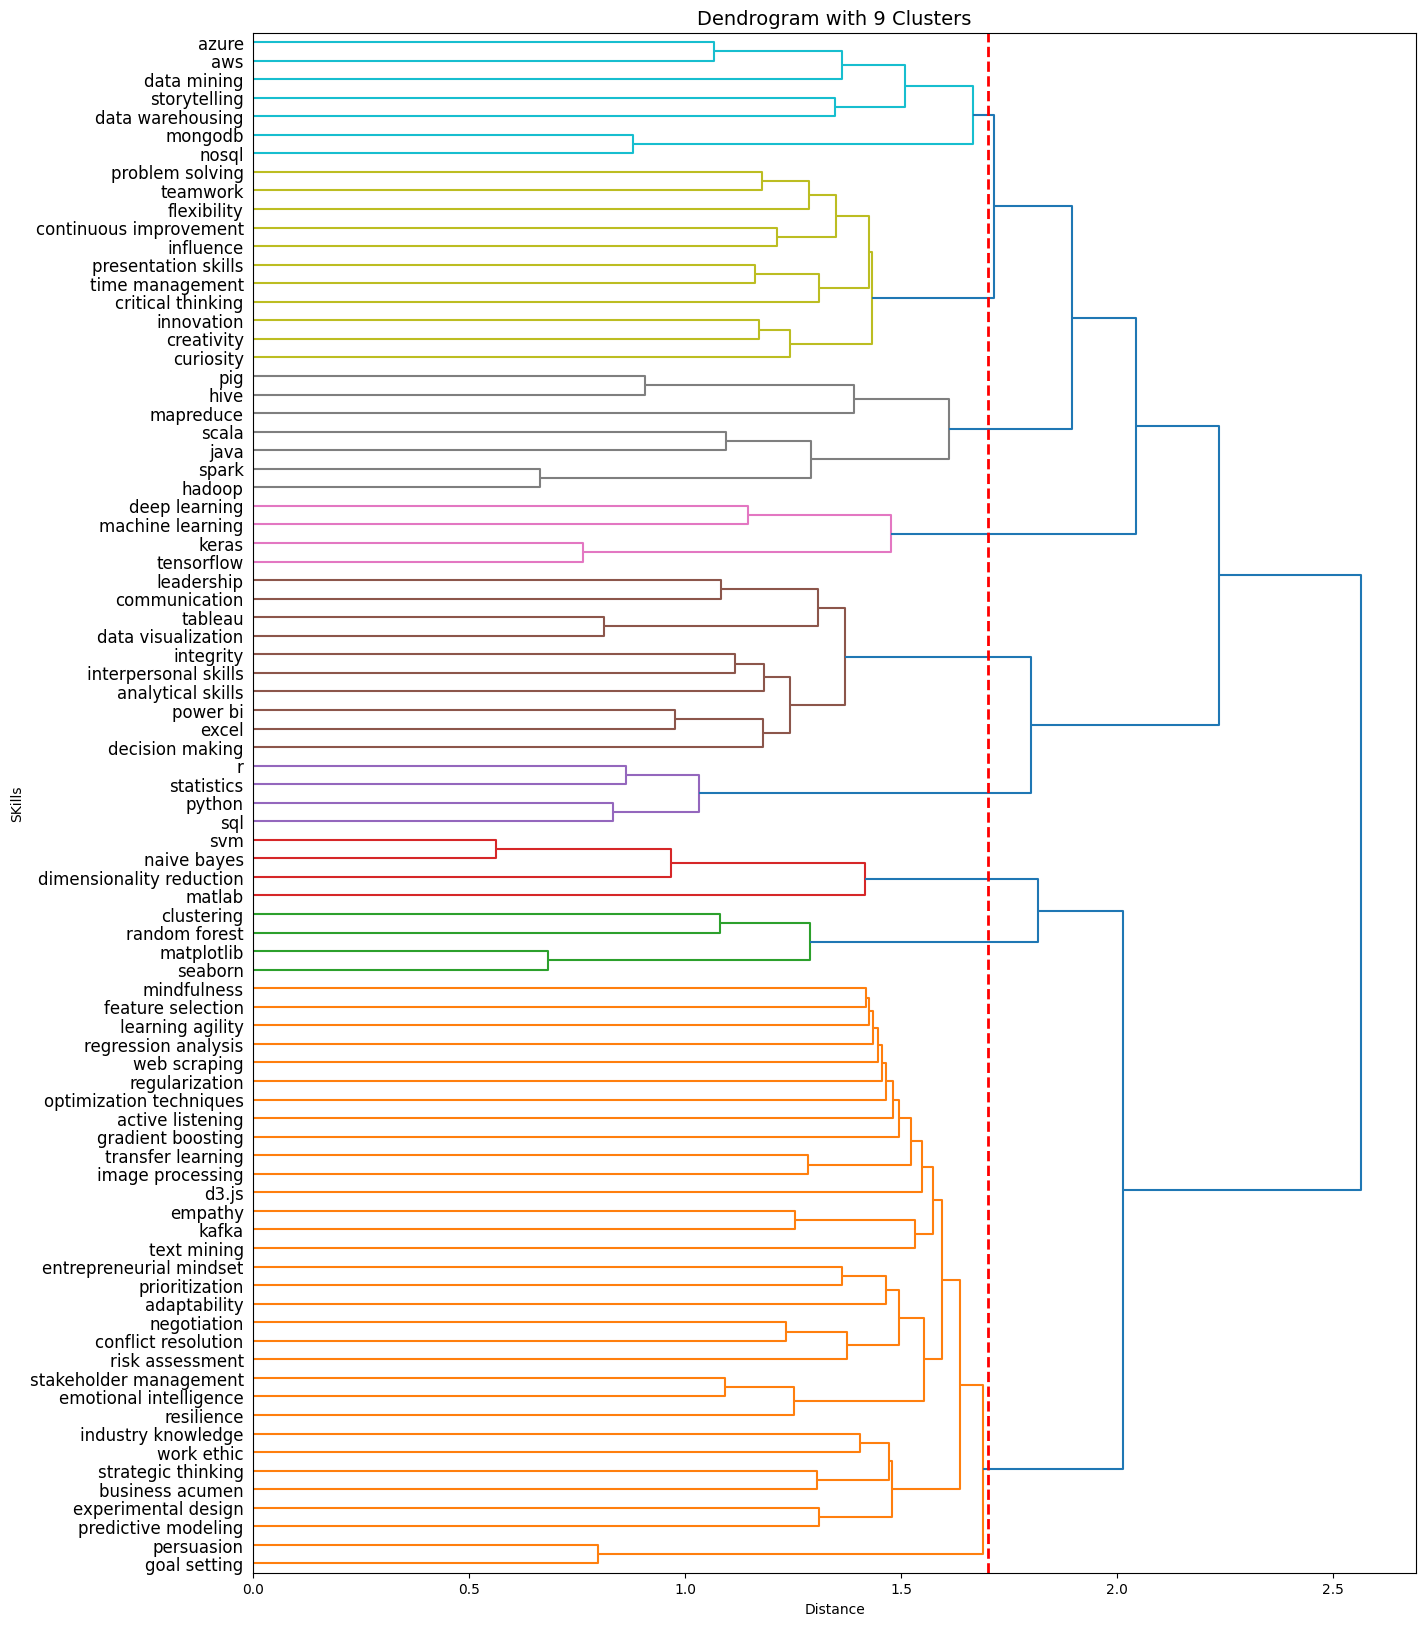

In [ ]:
#plotting the dendrogram
fig, ax = plt.subplots(figsize = (15, 20))
dendrogram(clusters, labels = encoded_df.columns, color_threshold = tr, orientation = 'right')
plt.xlabel('Distance')
plt.ylabel('SKills')
plt.yticks(fontsize=12)
plt.title('Dendrogram with {} Clusters'.format(cluster_num), fontsize = 14)
plt.axvline(x=1.7, color='red', linewidth = 2, linestyle='--')
plt.show()

###**Course Curriculum from Hierarchical Clustering**
**Course 1: Introduction to Data Analytics**<br>
***Syllabus:*** *statistics, sql, r, python*</br>
</br>
**Course 2: Foundations of Data Science**<br>
***Syllabus:*** *matlab, naive bayes, svm, dimensionality reduction*</br>
</br>
**Course 3: Advanced Data Science and Machine Learning**<br>
***Syllabus:*** *predictive modeling, regression analysis, optimization techniques, experimental design, image processing, text mining, web scraping, kafka, d3.js, feature selection, regularization, gradient boosting*</br>
</br>
**Course 4: Business Intelligence and Visualization**<br>
***Syllabus:*** *data visualization, excel, tableau, power bi, communication, decision making, analytical skills*</br>
</br>
**Course 5: Introduction to Deep Learning and Neural Networks**<br>
***Syllabus:*** *machine learning, deep learning, tensorflow, keras*</br>
</br>
**Course 6: Big Data Analytics**<br>
***Syllabus:*** *hadoop, spark, mapreduce, hive, pig, java, scala*</br>
</br>
**Course 7: Advanced Data Mining and Data Engineering Techniques**<br>
***Syllabus:*** *data mining, data warehousing, nosql, aws, azure, mongodb*</br>
</br>
**Course 8: Professional Development for Workplace Success**<br>
***Syllabus:*** *teamwork, creativity, problem solving, critical thinking, time management, flexibility, influence, curiosity, continuous improvement, innovation, presentation skills*</br>

## Part 4 - Clustering Implementation

###Feature Engineering

#### 1. Average Salary per Skill

In [ ]:
# 1. average salary per skill
avg_sal_df = encoded_df.copy()
avg_sal_df['Salary'] = skills_df['Salary']
skill_cols = avg_sal_df.iloc[:,:-1].columns
avg_sal_arr = []
for i in skill_cols:
  rows = avg_sal_df[i] == 1
  rows_filtered = avg_sal_df[rows]
  avg_sal = rows_filtered['Salary'].mean()
  avg_sal_arr.append(avg_sal)

print(avg_sal_arr)

[80077.94759206798, 85195.28593272172, 87776.14457831325, 81553.16304347826, 76362.53038674033, 81462.6875, 74959.0, 101170.3, 82976.22222222222, 89838.3, 92648.5, 88472.0, 74844.32608695653, 77922.58258527827, 88316.71621621621, 84297.57971014493, 89281.19473684211, 85451.15789473684, 88472.0, 87118.5, 82976.22222222222, 81048.51769911505, 81450.18220338984, 80791.11728395062, 86609.57692307692, 74002.31818181818, 70671.65314136125, 76390.57456140351, 73867.85221674877, 88472.0, 79432.22222222222, 83716.81818181818, 88198.83333333333, 87699.15625, 87624.8, 88472.0, 88472.0, 91548.54838709677, 88472.0, 8100.0, 88472.0, 80228.33333333333, 73926.66666666667, 75175.75202702703, 75529.03888888888, 68237.54545454546, 75923.16875, 70157.6606060606, 70835.67156862745, 72875.665, 74970.16, 63741.0, 76867.15384615384, 63741.0, 72687.32552083333, 75020.0, 72332.67559523809, 73610.4, 69393.38461538461, 77171.86923076923, 76106.5, 78289.18, 63741.0, 79295.11739130435, 72774.513671875, 67718.428571

#### 2. Freq of Skills

In [ ]:
#2. frequency of skills
skill_counts = skill_counts_df.iloc[:,11:].sum().tolist()

#### 3. Hard vs Soft Skills

In [ ]:
# 3. hard or soft skill
index = encoded_df.columns.values.tolist().index('transfer learning')
skill_coding = [1 if i <= index or (len(encoded_df.columns.values) - i) <= 3 else 0 for i in range(len(encoded_df.columns.values))]

#### 4. Postings with Skill

In [ ]:
# 4. number of postings with the skill
postings_count = []
for i in skill_cols:
  c_val = skills_df[skills_df[i] > 0].shape[0]
  postings_count.append(c_val)

#### 5. Count of Remote Postings for Each Skill

In [ ]:
# 5. count of remote postings for each skill
remote_count = []
for i in skill_cols:
 remote_filter = skills_df[skills_df[i] > 0]
 c_val_remote = remote_filter[remote_filter['Mode of Work'] == 'remote'].shape[0]
 remote_count.append(c_val_remote)

#### 6. Average Salary for Skill in Ontario

In [ ]:
# 6. average salary per skill for job in ontario
avg_sal_on = []

for i in skill_cols:
  prov_filter = skills_df[skills_df[i] > 0]
  c_val_on = prov_filter[prov_filter['Province'] == 'on']['Salary'].mean()
  avg_sal_on.append(c_val_on)

ontario_avg = salary_loc[salary_loc['Province'] == 'on']['Salary'].item()
avg_sal_on = pd.Series(avg_sal_on).fillna(ontario_avg).tolist()

#### 7. Number of Correlated Skills

In [ ]:
# 7. number of correlated skills
corr_count = skill_counts_df.iloc[:,11:].corr()
corr_count = corr_count.apply(lambda x: (x > 0.4).sum()-1, axis=1)

#### 8. Count of Skills in Toronto and Vancouver

In [ ]:
# 8. count of skills in toronto and vancouver
city_count = []
for i in skill_cols:
 city_filter = skills_df[skills_df[i] > 0]
 c_val_city = city_filter[(city_filter['City'] == 'toronto') | (city_filter['City'] == 'vancouver')].shape[0]
 city_count.append(c_val_city)

#### 9. Co-Occurence of Each Skill

In [ ]:
#9. co-occurence of each skill
co_occ_sum = []
for i in skill_cols:
  for j in range(encoded_df.shape[0]):
    if encoded_df.loc[j, i] == 1:
      row_filt = encoded_df[encoded_df[i] == 1]
      row_sum = (row_filt.sum(axis = 1) - 1)/row_filt.shape[0]
  co_occ_sum.append(row_sum.sum())

#### 10. Average Distance of Each Skill

In [ ]:
#10. average distance of each skill 
avg_skill_dist = np.mean(distance_sq_cos, axis=0)

### K-Means Implementation

In [ ]:
#adding all features to the final dataframe

final_data = {
    'Average Salary': avg_sal_arr,
    'Skill Count': skill_counts,
    'Skill Type': skill_coding,
    'Frequency': postings_count,
    'Remote Roles': remote_count,
    'Average Ontario Salary': avg_sal_on,
    'Number of Correlated Skills': corr_count,
    'City Skill Count': city_count,
    'Co-Occurence Rate': co_occ_sum,
    'Average Distance': avg_skill_dist
    
}

final_df = pd.DataFrame(final_data, index = encoded_df.columns.values)

#### Initial K-Means Clustering

In [ ]:
#standardizing the data and applying k-means clustering

scaler = StandardScaler()
final_std_data = scaler.fit_transform(final_df)

kmeans = KMeans(n_clusters=8)
kmeans.fit(final_std_data)

cluster_labels = kmeans.labels_
final_df['Cluster'] = cluster_labels

In [ ]:
#grouping skills based on cluster labels from k-means

cluster_group = final_df.groupby('Cluster')
cluster_skills = {}

for cluster_label, group in cluster_group:
    skills_cl = group.index.tolist()
    cluster_skills[cluster_label] = skills_cl

#printing the list of skills for each cluster
for cluster_label, skills_cl in cluster_skills.items():
    print('Cluster {}: {}'.format(cluster_label+1,skills_cl))

Cluster 1: ['statistics', 'data visualization', 'r', 'excel', 'tableau', 'power bi', 'leadership', 'integrity', 'innovation']
Cluster 2: ['teamwork', 'creativity', 'problem solving', 'critical thinking', 'time management', 'interpersonal skills', 'decision making', 'analytical skills', 'flexibility', 'influence', 'curiosity', 'continuous improvement', 'business acumen', 'storytelling', 'presentation skills']
Cluster 3: ['deep learning', 'data mining', 'optimization techniques', 'text mining', 'nosql', 'kafka', 'mapreduce', 'scala', 'd3.js', 'seaborn', 'matplotlib', 'keras', 'random forest', 'clustering', 'aws', 'mongodb']
Cluster 4: ['hadoop', 'spark', 'hive', 'pig', 'tensorflow', 'naive bayes', 'svm', 'dimensionality reduction']
Cluster 5: ['feature selection']
Cluster 6: ['machine learning', 'sql', 'python', 'communication']
Cluster 7: ['predictive modeling', 'regression analysis', 'experimental design', 'image processing', 'web scraping', 'data warehousing', 'java', 'matlab', 'regul

#### Finding the Optimal k-value (Elbow Method)

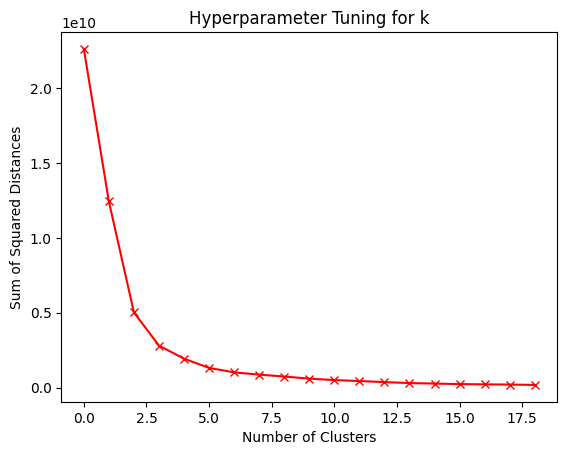

In [ ]:
squared_dist = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(final_df)
    squared_dist.append(kmeans.inertia_)

plt.plot(squared_dist, marker = 'x', color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Hyperparameter Tuning for k')
plt.show()

#### K-Means after Hyperparameter Tuning

In [ ]:
#applying k-means afetr hyperparameter tuning

kmeans = KMeans(n_clusters=11)
kmeans.fit(final_std_data)

cluster_labels = kmeans.labels_

final_df['Cluster'] = cluster_labels

In [ ]:
#grouping skills based on cluster labels from k-means after hyperparameter tuning

cluster_group = final_df.groupby('Cluster')
cluster_skills = {}

for cluster_label, group in cluster_group:
    skills_cl = group.index.tolist()
    cluster_skills[cluster_label] = skills_cl

#printing the list of skills for each cluster
for cluster_label, skills_cl in cluster_skills.items():
    print('Cluster {}: {}'.format(cluster_label+1,skills_cl))

Cluster 1: ['adaptability', 'emotional intelligence', 'empathy', 'active listening', 'conflict resolution', 'negotiation', 'goal setting', 'work ethic', 'persuasion', 'resilience', 'prioritization', 'learning agility', 'risk assessment', 'stakeholder management', 'industry knowledge', 'entrepreneurial mindset', 'strategic thinking', 'mindfulness']
Cluster 2: ['deep learning', 'data mining', 'data visualization', 'r', 'java', 'power bi', 'aws', 'azure']
Cluster 3: ['statistics', 'machine learning', 'sql', 'python']
Cluster 4: ['nosql', 'mapreduce', 'pig', 'd3.js', 'seaborn', 'matplotlib', 'keras', 'random forest', 'naive bayes', 'svm', 'dimensionality reduction', 'mongodb']
Cluster 5: ['feature selection']
Cluster 6: ['teamwork', 'creativity', 'problem solving', 'critical thinking', 'time management', 'interpersonal skills', 'decision making', 'analytical skills', 'flexibility', 'influence', 'curiosity', 'continuous improvement', 'business acumen', 'storytelling', 'presentation skills']

### **Course Curriculum from K-Means Clustering**
**Course 1: Data Science Fundamentals**<br>
***Syllabus:*** *machine learning, sql, python*</br>
</br>
**Course 2: Working with Data**<br>
***Syllabus:*** *image processing, web scraping, data warehousing, regularization*</br>
</br>
**Course 3: The Art of Visualizing Data**<br>
***Syllabus:*** *data visualization, tableau, power bi*</br>
</br>
**Course 4: Machine Learning Algorithms and Cloud Based Data Analytics**<br>
***Syllabus:*** *hadoop, spark, hive,tensorflow, keras, naive bayes, svm, dimensionality reduction*</br>
</br>
**Course 5: Advanced Data Mining Techniques**<br>
***Syllabus:*** *predictive modeling, experimental design, text mining, mongodb*</br>
</br>
**Course 6: Foundations of Deep Learning**<br>
***Syllabus:*** *deep learning, data mining, optimization techniques*</br>
</br>
**Course 7: Essential Business Skills for Data Scientists**<br>
***Syllabus:*** *teamwork, creativity, problem solving, critical thinking, time management, interpersonal skills, decision making, analytical skills, flexibility, continuous improvement, business acumen, presentation skills*</br>
</br>
**Course 8: Leadership Excellence: Essential Skills for Success**<br>
***Syllabus:*** *adaptability, emotional intelligence, empathy, active listening, conflict resolution, negotiation, goal setting, work ethic, persuasion, resilience, prioritization, learning agility, risk assessment, stakeholder management, industry knowledge, entrepreneurial mindset, strategic thinking, mindfulness*

### Scatter Plots for K-Means

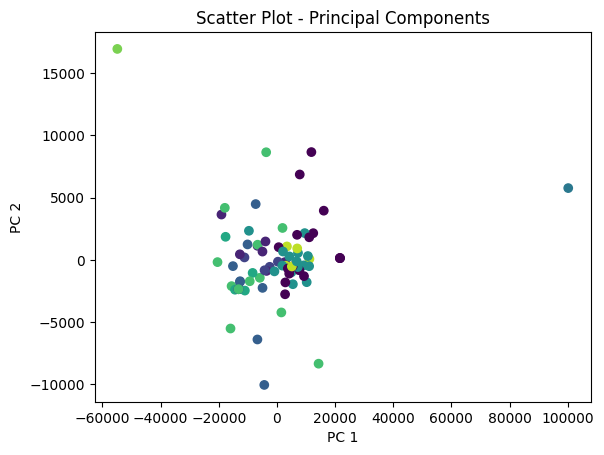

In [ ]:
#using principal components
pca = PCA(n_components=2)
p_comp = pca.fit_transform(final_df.iloc[:,:-1])

plt.scatter(p_comp[:, 0], p_comp[:, 1], c = cluster_labels, cmap='viridis')

plt.title('Scatter Plot - Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

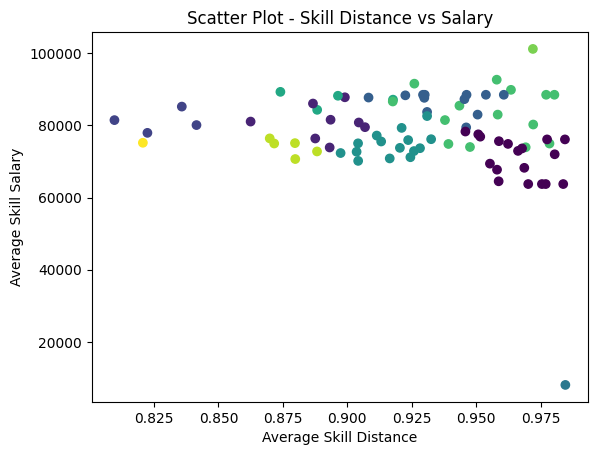

In [ ]:
#average skill distance vs average salary
plt.scatter(avg_skill_dist, avg_sal_arr, c = cluster_labels, cmap='viridis')

plt.title('Scatter Plot - Skill Distance vs Salary')
plt.xlabel('Average Skill Distance')
plt.ylabel('Average Skill Salary')

plt.show()

## Part 5 - Interpretation of Results and Visualizations

**a. Dendrogram**
* Please refer to the 'Dendrogram' sub-heading in Part 3.
* The dendrogram clearly shows the clustering of the generated 83 skills into 9 clusters.
* From these 9 clusters, 8 were chosen to design the course curriculum. One cluster did not have three skills. 
* First, the pairwise distances were found for the skills.
* Then, the skills were clustered based on a distance threshold. Here, the threshold was taken as 1.7.
* Different clusters are depicted in different colours and a line depicting the threshold is also plotted.

**b. Scatter Plots from K-Means Clustering**
* Please refer to the 'Scatter Plot for K-Means' sub-heading in Part 4.
* 2 scatter plots were plotted - one with principal components & the other one with average distance and average salary.
* In the 'Skill Distance vs Salary' graph, the clusters are some what differentiable. But, still doesn't have clear demarcations.
* The 'Principal Components' graph is too crowded with no cluster differentiation.
* From this, it is clear that better features need to be engineered to get better results.
* For better feature engineering, more information about each posting is required. 
* A more granular extraction of important information from job descriptions would significantly improve the results. 

**c. Elbow Plot to Find Optimal k-value**
* Please refer to 'Finding the Optimal k-value' sub-heading in Part 4.
* Initially, k-means clustering was done using 8 clusters as the hyperparameter.
* But ideally, as per the elbow plot, 3 or 4 would be the best k-value for getting the best clusters. 
* After analyzing the elbow plot further, it can be seen that values around 9 to 11 would have a relatively low sum of squared mean distances.
* Also, increasing the k-value did not cause a noticeable difference in computational time. 
* So, 11 was chosen as the hyperparameter for k-means clustering.

## Part 6 - Discussion

**Methodology**
* First, the data was scraped using the provided code and stored as a csv file.
* Two job titles - Data Analyst and Data Scientist were considered. The location was set to Canada.
* Then, the dataset was cleaned. Especially, the description, salary and location data.
* Next, Chat GPT API was used to create a list of skils. A few missing skills were added by me. A total of 102 skills was generated.
* After that, instances of skills in job descriptions were extracted and the count of each skill as calculated. 
* Then, the data was visualized to understand the skill trends.
* Next, one hot encoding was done to refelect the absence/presence of skills rather than skill counts.
* After that, hierachical clustering was done using the distance matrix and the dendrogram was generated.
* 10 features were engineered based on the skills to facilitate k-means clustering.
* Then, the k-means clustering was done and hyperparameter tuning was done to find the optimal number of clusters.
* Finally, Chat GPT API was used to describe the results from both types of clustering. (Please refer to Part 7)
<br></br>

**Results**
* Based on the clusters formed from both types of clustering, I think that course curriculum generated using k-means clustering is better.
* K-means clustering provides more flexibility as the number of clusters can be specified beforehand. 
* Hierarchical clustering also offers certain amount of flexibility as the threshold can be specified. But, the it is heavily dependent on distances between the skills annd metrics for calculating these distances. 
* K-means clustering just relies on the distance of skills from randomly asigned centroids.
* It is also worth noting that hierarchical clustering does not work well with categorical data. k-means clustering is relatively better at handling such data.
* It is also easily scalable and cluster convergence is guaranteed.
* Hence, the course curriculum generated using K-Means is choosen as the final course curriculum.

<br></br>
**Final Course Curriculum (Taken from K-Means Clustering)**

**Program Name:** Masters of Business and Management in Data Science and Artificial Intelligence

**Location:** University of Toronto

**Courses:**

1. **APS1060: Data Science Fundamentals**<br>
***Syllabus:*** *machine learning, sql, python*</br>
</br>
2. **MIE1645: Working with Data**<br>
***Syllabus:*** *image processing, web scraping, data warehousing, regularization*</br>
</br>
3. **APS1065: The Art of Visualizing Data**<br>
***Syllabus:*** *data visualization, tableau, power bi*</br>
</br>
4. **ECE1552: Machine Learning Algorithms and Cloud Based Data Analytics**<br>
***Syllabus:*** *hadoop, spark, hive,tensorflow, keras, naive bayes, svm, dimensionality reduction*</br>
</br>
5. **MIE1646: Advanced Data Mining Techniques**<br>
***Syllabus:*** *predictive modeling, experimental design, text mining, mongodb*</br>
</br>
6. **MIE1635: Foundations of Deep Learning**<br>
***Syllabus:*** *deep learning, data mining, optimization techniques*</br>
</br>
7. **APS1073: Essential Business Skills for Data Scientists**<br>
***Syllabus:*** *teamwork, creativity, problem solving, critical thinking, time management, interpersonal skills, decision making, analytical skills, flexibility, continuous improvement, business acumen, presentation skills*</br>
</br>
8. **TEP2006: Leadership Excellence: Essential Skills for Success**<br>
***Syllabus:*** *adaptability, emotional intelligence, empathy, active listening, conflict resolution, negotiation, goal setting, work ethic, persuasion, resilience, prioritization, learning agility, risk assessment, stakeholder management, industry knowledge, entrepreneurial mindset, strategic thinking, mindfulness*

<br></br>
**Justification for Course Ordering**

Course 1: Data Science Fundamentals: This course covers key concepts of machine learning, database querying and Python programming. Serves as a strong foundation for subsequent courses.

Course 2: Working with Data: This is a more practical course that focuses on web scraping, data warehousing and processing. Collecting and data processing is usually the first step in a data science workflow. These skills are essential for real-world data science applications and other projects. 

Course 3: The Art of Visualizing Data: This course focuses on data visualization using powerful tools such as Tableau and Power BI. Effective communication of insights is essential for data analysts and scientists. After taking this course, learners should be able to create informative and meaningful visualizations. 

Course 4: Advanced Data Mining Techniques: This course builds on the knowledge gained in earlier courses and introduces more advanced techniques like predictive modelling, experimental design, and text mining. These topics act as a good introduction to the next course on this list.

Course 5: Machine Learning Algorithms and Cloud-Based Data Analytics: This course further helps learners explore advanced concepts of machine learning algorithms. The covered topics are TensorFlow, Keras, Naive Bayes, Support Vector Machine, and dimensionality reduction techniques. It also covers cloud platforms like Hadoop, Spark and Hive which are critical skills in today's data-driven business environment.

Course 6: Foundations of Deep Learning: This course focuses on deep learning techniques, such as neural networks, image recognition, natural language processing, and speech recognition. The demand for these skills is rising exponentially as they are being widely adopted by several industries. 

Course 7: Essential Business Skills for Data Scientists: This course focuses on developing essential business skills that are important for data analysts and scientists. These skills include problem-solving, critical thinking, decision-making, and presentation skills. Business acumen is also included, as data professionals are required to have knowledge about their domain to align their findings with business objectives.

Course 8: Leadership Excellence: Essential Skills for Success: This course focuses on developing leadership skills and other related skills like emotional intelligence, conflict resolution, goal setting, prioritization, and strategic thinking. These skills are crucial for data analysts and scientists who aspire to take up leadership roles in the future. 

On the whole, this course plan is a perfect amalgamation of technical and business courses that provides a well-rounded learning opportunity. It equips students with the necessary skills to effectively analyze and interpret data, make data-driven decisions, and lead data science projects successfully.





## Part 7 - OpenAI Implementation

In [ ]:
#describing hierachical clustering

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {
        "role": "system", "content": "You are assigned as a reviewer for commenting on the clustering results of skills into courses",
        "role": "user", "content": "Describe the clustering results of Hierarchical Clustering. Talk about the similarity amongst clusters and discuss about common themes. Here are the clusters. Cluster 1: predictive modeling, regression analysis, optimization techniques, experimental design, image processing, text mining, web scraping, kafka, d3.js, feature selection, regularization, gradient boosting, transfer learning, adaptability, emotional intelligence, empathy, active listening, conflict resolution, negotiation, goal setting, work ethic, persuasion, resilience, prioritization, learning agility, risk assessment, business acumen, stakeholder management, industry knowledge, entrepreneurial mindset, strategic thinking, mindfulness. Cluster 2: seaborn, matplotlib, random forest, clustering. Cluster 3: matlab, naive bayes, svm, dimensionality reduction. Cluster 4: statistics, sql, r, python. Cluster 5: data visualization, excel, tableau, power bi, communication, leadership, interpersonal skills, decision making, analytical skills, integrity. Cluster 6: machine learning, deep learning, tensorflow, keras. Cluster 7: hadoop, spark, mapreduce, hive, pig, java, scala. Cluster 8: teamwork, creativity, problem solving, critical thinking, time management, flexibility, influence, curiosity, continuous improvement, innovation, presentation skills. Cluster 9: data mining, data warehousing, nosql, storytelling, aws, azure, mongodb."},
])

print(completion.choices[0].message.content)

The clustering results of Hierarchical Clustering show that the clusters share a few common themes. The first cluster includes topics related to data science, machine learning, and business skills such as predictive modeling, regression analysis, optimization techniques, experimental design, emotional intelligence, conflict resolution, and stakeholder management. The second cluster includes topics related to data visualization and statistical modeling like seaborn, matplotlib, random forest, and clustering.

Cluster 3 includes topics focusing on programming languages and data analysis tools like Matlab, naive bayes, SVM, and dimensionality reduction. Cluster 4 primarily focuses on programming languages, including statistics, SQL, R, and Python. Cluster 5 includes topics related to communication, leadership, analytical skills, and decision making, along with data visualization tools like Excel, Tableau, Power BI.

Cluster 6 primarily focuses on deep learning and machine learning technol

In [ ]:
#describing k-means clustering

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {
        "role": "system", "content": "You are assigned as a reviewer for commenting on the clustering results of skills into courses",
        "role": "user", "content": "Describe the clustering results of K-Means Clustering. Talk about the similarity amongst clusters and discuss about common themes. Here are 8 clusters chosen from the obtained 11 clusters. 3 clusters were removed as they had less than 3 skills. Cluster 1: 'predictive modeling', 'regression analysis', 'experimental design', 'image processing', 'text mining', 'web scraping', 'data warehousing', 'kafka', 'matlab', 'd3.js', 'random forest', 'regularization', 'gradient boosting', 'transfer learning', 'mongodb'. Cluster 2: 'nosql', 'hadoop', 'spark', 'mapreduce', 'hive', 'pig', 'seaborn', 'matplotlib', 'tensorflow', 'keras', 'naive bayes', 'svm', 'dimensionality reduction'. Cluster 3: 'teamwork', 'creativity', 'problem solving', 'critical thinking', 'time management', 'interpersonal skills', 'decision making', 'analytical skills', 'flexibility', 'influence', 'curiosity', 'continuous improvement', 'business acumen', 'storytelling', 'presentation skills'. Cluster 4: 'statistics', 'data visualization', 'r', 'excel', 'tableau', 'power bi'. Cluster 5: 'sql', 'python', 'communication'. Cluster 6: 'adaptability', 'emotional intelligence', 'empathy', 'active listening', 'conflict resolution', 'negotiation', 'goal setting', 'work ethic', 'persuasion', 'resilience', 'prioritization', 'learning agility', 'risk assessment', 'stakeholder management', 'industry knowledge', 'entrepreneurial mindset', 'strategic thinking', 'mindfulness'. Cluster 7: ['deep learning', 'data mining', 'java', 'scala', 'clustering', 'aws', 'azure'. Cluster 8: 'leadership', 'integrity', 'innovation'"},
  ])
print(completion.choices[0].message.content)

From the clustering results, it is clear that certain clusters have overlapping skills such as Cluster 2 and Cluster 7 which both have skills related to Big Data and Machine Learning. This indicates that those skills are closely related and may require similar knowledge or experience.

Cluster 3 focuses on soft skills such as teamwork, creativity, and critical thinking. These skills are essential for working in a team environment and solving complex problems. Similarly, Cluster 6 has skills related to adaptability, emotional intelligence, and resilience. This indicates that successful candidates in these domains may need to work in a constantly-changing environment and be able to handle pressure.

Cluster 4 focuses on traditional data analytics tools such as statistics, data visualization, and Excel. These skills were popular before the rise of Big Data and Machine Learning but are still sought after in many industries.

Cluster 5 has SQL and Python which are both essential languages f